In [199]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import numpy as np
from pprint import pprint

In [200]:
str_filename = '../dune_artblocks_mints.csv'

In [201]:
fh = open(str_filename)
csv_reader = csv.reader(fh)

In [202]:
csv_reader = csv.reader(fh)
csv_header = next(csv_reader)

In [203]:
fh.close()

In [204]:
df_temp = pd.read_csv(str_filename, header=None, skiprows=1, names=csv_header)
i = 0
for row in df_temp['time']:
    row = row.replace('+00:00', '')
    row = row.replace('T', ' ')
    df_temp.at[i, 'time'] = row
    i += 1
df_temp

,time,name,eth_total,usd_total,refund_eth,refund_usd,gas_eth,project_type,projectid,tokenid,tx_hash,mint_count
0,2022-08-09 21:30:26,Gels by Jason Brown,0.15,256.4190,0.0,0.0,0.000209,Factory,322,322000132,\x657b0e82d8e891d414e853f70eedb9a3d585b6db2b4f...,1
1,2022-08-09 21:27:20,THE SOURCE CoDE by O,0.20,341.8920,0.0,0.0,0.000153,Factory,187,187000165,\xc2b38ee0431f08dfbf60c9a371eb2759af769b17b463...,1
2,2022-08-09 21:24:21,Facets by conundrume,0.10,170.6110,0.0,0.0,0.000153,Factory,249,249000222,\x5e954524f1505cb1a71cfd6580bf7d9a248e885b6b57...,1
3,2022-08-09 21:01:56,Swing by Eltono,0.15,255.0600,0.0,0.0,0.000207,Factory,184,184000249,\x10e9f2c68f9254fa1e394b0dc98bd30c34a0ad0ba81b...,1
4,2022-08-09 17:07:06,8 by Bård Ionson,0.18,304.5492,0.0,0.0,0.000159,Factory,179,179000105,\x24a35c0cbcf342fbeded159696463339b578b65fe535...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
44890,2022-01-01 03:26:49,Dream Engine by REMO,0.10,373.1310,0.0,0.0,0.014069,Factory,223,223000265,\xbdc649a4b50067b30675568bd5337b0c1356c3c019c9...,1
44891,2022-01-01 02:50:44,Freehand by WAWAA,0.12,447.8640,0.0,0.0,0.014876,Factory,211,211000164,\xf379b87e7bd9d8214790fc17e564cf545aff708f71e6...,1
44892,2022-01-01 01:11:00,CryptoNewYorker by Q,0.00,0.0000,0.0,0.0,0.021243,Factory,189,189000984,\xd50846180a99ba101219e33d4eb2b425d0bcf5530994...,1
44893,2022-01-01 00:58:00,Attraction by Jos Vr,0.15,558.3630,0.0,0.0,0.013791,Factory,229,229000312,\x68d37300a53c2d1f7c683af5bb87010bde0a0027f1ad...,1


In [211]:
df_sig = df_temp.loc[(df_temp['project_type'] == 'Curated')]
#df_sig = df_temp
df_sig = df_sig.loc[(df_sig['eth_total'] > 0)]
df_sig['eth_total']

4744     3.000000
4745     2.858306
4746     2.858306
4747     2.868078
4748     2.809446
           ...   
44151    3.500000
44152    3.500000
44153    3.500000
44154    3.500000
44155    3.500000
Name: eth_total, Length: 12322, dtype: float64

In [232]:
#df_sig = df_sig.set_index('projectid')
df_ids = df_sig.groupby('projectid').sum().reset_index()
df_id = df_ids['projectid']
df_count = df_ids['mint_count']
i = 0
diffDates = []
for index in df_id:
    df_collection = df_sig.loc[(df_sig['projectid'] == df_id[i])].reset_index()
    firstDate = datetime.strptime(df_collection.time[0], '%Y-%m-%d %H:%M:%S')
    lastDate = datetime.strptime(df_collection.time[df_count[i] - 1], '%Y-%m-%d %H:%M:%S')
    diffDate = firstDate - lastDate
    diffDate = diffDate.total_seconds() / 60
    diffDates.append(diffDate)
    i += 1
d = {'projectid': df_id, 'window': diffDates}
df_dates = pd.DataFrame(data=d)
df_dates

,projectid,window
0,233,12.866667
1,250,75.116667
2,255,35.883333
3,261,51.500000
4,267,49.300000
5,282,37.966667
6,283,455.016667
7,284,29.516667
8,296,1430.650000
9,304,36.400000


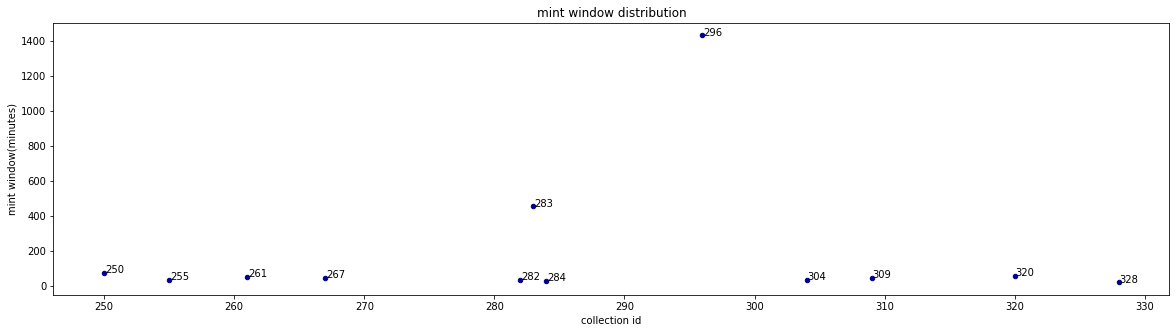

In [235]:
df_dates = df_dates.loc[(df_dates['window'] >= 20)]
plt.rcParams["figure.figsize"] = (20,5)
ax = df_dates.plot.scatter(x='projectid', y='window',c='darkBlue', xlabel="collection id", ylabel="mint window(minutes)"
                         ,title="mint window distribution")
for i, txt in enumerate(df_dates.projectid):
   ax.annotate(txt, (df_dates.projectid.iat[i]+0.05, df_dates.window.iat[i]))
plt.show()